In [1]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
sample = pd.read_csv('final_database_2015_2016.csv')

In [3]:
sample[['Vote Count','vote_count']]


Vote Count  vote_count
0            131       132.0
1            218       217.0
2            216       226.0
3            111       115.0
4             60        61.0
5            126       132.0
6            145       149.0
7            102       104.0
8             62        67.0
9            128       130.0
10           226       227.0
11            50        51.0
12           279       289.0
13            79        79.0
14            62        64.0
15           172       175.0
16           103       103.0
17           574       584.0
18           338       350.0
19           861       867.0
20           399       404.0
21            53        58.0
22           366       369.0
23            77        78.0
24           118       122.0
25           143       148.0
26            50        51.0
27          5104      5302.0
28            76        80.0
29           245       257.0
...          ...         ...
998           64         NaN
999           59         NaN
1000          70         NaN
1001          63         NaN
1002          54         NaN
1003         147         NaN
1004          51         NaN
1005          78         NaN
1006         100         NaN
1007         136         NaN
1008          54         NaN
1009          51         NaN
1010          64         NaN
1011          52         NaN
1012          56         NaN
1013         116         NaN
1014          54         NaN
1015          84         NaN
1016          71         NaN
1017         126         NaN
1018          52         NaN
1019          61         NaN
1020          57         NaN
1021          65         NaN
1022          66         NaN
1023          71         NaN
1024          68         NaN
1025          72         NaN
1026          60         NaN
1027         168         NaN

[1028 rows x 2 columns]

In [4]:
sample.corr()

Unnamed: 0  Actor1 Id  Popularity  Vote Average  Vote Count  \
Unnamed: 0      1.000000   0.108855   -0.389999     -0.115510   -0.361573   
Actor1 Id       0.108855   1.000000   -0.103489      0.103201   -0.076865   
Popularity     -0.389999  -0.103489    1.000000      0.174464    0.681013   
Vote Average   -0.115510   0.103201    0.174464      1.000000    0.257230   
Vote Count     -0.361573  -0.076865    0.681013      0.257230    1.000000   
adult                NaN        NaN         NaN           NaN         NaN   
budget         -0.329781  -0.069582    0.499020      0.077827    0.706389   
id             -0.065417   0.158374   -0.043033     -0.091170   -0.190243   
revenue        -0.285344  -0.022084    0.587038      0.153862    0.782136   
runtime        -0.103796  -0.060210    0.168073      0.307669    0.254258   
video                NaN        NaN         NaN           NaN         NaN   
vote_average    0.024890   0.084928    0.159918      0.998861    0.289028   
vote_count      0.050287  -0.071724    0.840908      0.289560    0.999910   

              adult    budget        id   revenue   runtime  video  \
Unnamed: 0      NaN -0.329781 -0.065417 -0.285344 -0.103796    NaN   
Actor1 Id       NaN -0.069582  0.158374 -0.022084 -0.060210    NaN   
Popularity      NaN  0.499020 -0.043033  0.587038  0.168073    NaN   
Vote Average    NaN  0.077827 -0.091170  0.153862  0.307669    NaN   
Vote Count      NaN  0.706389 -0.190243  0.782136  0.254258    NaN   
adult           NaN       NaN       NaN       NaN       NaN    NaN   
budget          NaN  1.000000 -0.274826  0.782107  0.227405    NaN   
id              NaN -0.274826  1.000000 -0.187680 -0.100556    NaN   
revenue         NaN  0.782107 -0.187680  1.000000  0.180510    NaN   
runtime         NaN  0.227405 -0.100556  0.180510  1.000000    NaN   
video           NaN       NaN       NaN       NaN       NaN    NaN   
vote_average    NaN  0.157632  0.043700  0.180472  0.288145    NaN   
vote_count      NaN  0.784070 -0.486252  0.751051  0.294147    NaN   

              vote_average  vote_count  
Unnamed: 0        0.024890    0.050287  
Actor1 Id         0.084928   -0.071724  
Popularity        0.159918    0.840908  
Vote Average      0.998861    0.289560  
Vote Count        0.289028    0.999910  
adult                  NaN         NaN  
budget            0.157632    0.784070  
id                0.043700   -0.486252  
revenue           0.180472    0.751051  
runtime           0.288145    0.294147  
video                  NaN         NaN  
vote_average      1.000000    0.289623  
vote_count        0.289623    1.000000

In [5]:
sample.columns

Index([u'Unnamed: 0', u'Actor1 Id', u'Actor1 Name', u'Actor2 Id',
       u'Actor2 Name', u'Actor3 Id', u'Actor3 Name', u'Popularity',
       u'Release Date', u'Text', u'Title', u'Vote Average', u'Vote Count',
       u'adult', u'backdrop_path', u'belongs_to_collection', u'budget',
       u'genres', u'homepage', u'id', u'imdb_id', u'original_language',
       u'original_title', u'overview', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'revenue', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'video', u'vote_average',
       u'vote_count'],
      dtype='object')

In [6]:
genres = pd.read_csv('final_regressible_data_genres_only.csv')

In [7]:
len(genres)

1028

In [8]:
genres = genres.drop('Unnamed: 0',axis =1)
genres.head(2)


Popularity                                               Text     Title  \
0    1.907407  GASI'm america diesel is something else like y...  400 Days   
1    1.475098  DiegoI like to be able to tell you everything ...  45 Years   

   Vote Average  Vote Count  adult  budget  revenue  runtime  vote_count  \
0           4.2         131  False       0        0     91.0       132.0   
1           6.2         218  False       0        0     95.0       217.0   

       ...       ': 'History'  ': 'Horror'  ': 'Music'  ': 'Mystery'  \
0      ...                  0            0           0             1   
1      ...                  0            0           0             0   

   ': 'Romance'  ': 'Science Fiction'  ': 'TV Movie'  ': 'Thriller'  ': 'War'  \
0             0                     1              0              1         0   
1             0                     0              0              0         0   

   ': 'Western'  
0             0  
1             0  

[2 rows x 29 columns]

In [9]:
genres['Vote Average'] = genres['Vote Average'].apply(round)
genres['Vote Average'].value_counts()

6.0    391
7.0    326
5.0    187
8.0     92
4.0     30
9.0      1
3.0      1
Name: Vote Average, dtype: int64

In [58]:
genres[genres['Vote Average'] == 9.0]

Popularity                                               Text  \
299    1.067763  Why is this video so small??? Stopped watching...   

                                             Title  Vote Average  Vote Count  \
299  The Jinx: The Life and Deaths of Robert Durst           9.0          73   

     adult  budget  revenue  runtime  vote_count      ...       ': 'History'  \
299  False       0        0    240.0        77.0      ...                  0   

     ': 'Horror'  ': 'Music'  ': 'Mystery'  ': 'Romance'  \
299            0           0             0             0   

     ': 'Science Fiction'  ': 'TV Movie'  ': 'Thriller'  ': 'War'  \
299                     0              0              0         0   

     ': 'Western'  
299             0  

[1 rows x 29 columns]

In [71]:
df_15_16 = pd.read_csv("final_database_2015_2016.csv", encoding = "ISO-8859-1")


In [72]:
def correct_yr(val):
    return val.split('-')[0]
df_15_16['Release Date']=  df_15_16['Release Date'].apply(correct_yr)

In [73]:
df_15_16 = df_15_16[df_15_16['Release Date'].isin(['2015','2016'])]

In [74]:
import numpy as np
valid_titles =  np.array(df_15_16['Title'])

genres_15_16 = genres[genres['Title'].isin(valid_titles)]


In [75]:
genres_15_16.head()

Popularity                                               Text  \
0    1.907407  GASI'm america diesel is something else like y...   
1    1.475098  DiegoI like to be able to tell you everything ...   
2    1.404864  Fuck the writers , creators, directors , and e...   
3    2.173435  This got really good!Whomever thinks that this...   
4    1.077131  I hate how Avery was a bitch and the stuff she...   

             Title  Vote Average  Vote Count  adult  budget  revenue  runtime  \
0         400 Days           4.0         131  False       0        0     91.0   
1         45 Years           6.0         218  False       0        0     95.0   
2          6 Years           5.0         216  False       0        0     84.0   
3  A Bigger Splash           6.0         111  False       0  1936524    120.0   
4  A Girl Like Her           7.0          60  False       0        0     91.0   

   vote_count      ...       ': 'History'  ': 'Horror'  ': 'Music'  \
0       132.0      ...                  0            0           0   
1       217.0      ...                  0            0           0   
2       226.0      ...                  0            0           0   
3       115.0      ...                  0            0           0   
4        61.0      ...                  0            0           0   

   ': 'Mystery'  ': 'Romance'  ': 'Science Fiction'  ': 'TV Movie'  \
0             1             0                     1              0   
1             0             0                     0              0   
2             0             1                     0              0   
3             1             0                     0              0   
4             0             0                     0              0   

   ': 'Thriller'  ': 'War'  ': 'Western'  
0              1         0             0  
1              0         0             0  
2              0         0             0  
3              1         0             0  
4              0         0             0  

[5 rows x 29 columns]

In [76]:
def bin_va(val):
#     return round(val)
    if val > 0 and val <=4:
        return 1
    elif val > 4 and val <=6.5:
        return 2
    elif val > 6.5 and val <=10:
        return 3
    else:
        print val
        return 4

print(bin_va(5.6))

2


In [77]:
# genres_15_16['Vote Average']

In [78]:
genres_15_16_binned = genres_15_16.copy(deep=True)
genres_15_16_binned['Vote Average'] = genres_15_16_binned['Vote Average'].apply(bin_va)
genres_15_16_binned['Vote Average'].value_counts()

2    496
3    336
1     30
Name: Vote Average, dtype: int64

In [79]:
genres_15_16['Vote Average'].value_counts()

6.0    325
7.0    271
5.0    171
8.0     64
4.0     29
9.0      1
3.0      1
Name: Vote Average, dtype: int64

In [140]:
cols = [col for col in genres_15_16_binned.columns if col not in ['Title','Text','Vote Average','Popularity','vote_count','Vote Count', 'revenue']]
print(len(cols))
X2 =  genres_15_16_binned[cols]
Y2 = genres_15_16_binned['Vote Average']

23


In [160]:
X2.columns

Index([u'adult', u'budget', u'runtime', u'': 'Action'', u'': 'Adventure'',
       u'': 'Animation'', u'': 'Comedy'', u'': 'Crime'', u'': 'Documentary'',
       u'': 'Drama'', u'': 'Family'', u'': 'Fantasy'', u'': 'History'',
       u'': 'Horror'', u'': 'Music'', u'': 'Mystery'', u'': 'Romance'',
       u'': 'Science Fiction'', u'': 'TV Movie'', u'': 'Thriller'',
       u'': 'War'', u'': 'Western'', u'nlp_result'],
      dtype='object')

In [142]:

X2 = X2.fillna(0)
X2.head(10)

adult  budget  runtime  ': 'Action'  ': 'Adventure'  ': 'Animation'  \
0  False       0     91.0            0               0               0   
1  False       0     95.0            0               0               0   
2  False       0     84.0            0               0               0   
3  False       0    120.0            0               0               0   
4  False       0     91.0            0               0               0   
5  False       0    116.0            0               0               0   
6  False       0    106.0            0               0               0   
7  False       0    103.0            0               0               0   
8  False       0     97.0            0               0               0   
9  False       0     56.0            0               0               0   

   ': 'Comedy'  ': 'Crime'  ': 'Documentary'  ': 'Drama'     ...      \
0            0           0                 0           0     ...       
1            0           0                 0           1     ...       
2            0           0                 0           1     ...       
3            0           1                 0           1     ...       
4            0           0                 0           1     ...       
5            1           0                 0           1     ...       
6            1           0                 0           1     ...       
7            0           0                 0           1     ...       
8            0           0                 0           1     ...       
9            1           0                 0           0     ...       

   ': 'Horror'  ': 'Music'  ': 'Mystery'  ': 'Romance'  ': 'Science Fiction'  \
0            0           0             1             0                     1   
1            0           0             0             0                     0   
2            0           0             0             1                     0   
3            0           0             1             0                     0   
4            0           0             0             0                     0   
5            0           0             0             0                     0   
6            0           0             0             0                     0   
7            0           0             0             0                     0   
8            0           0             0             1                     0   
9            0           1             0             0                     0   

   ': 'TV Movie'  ': 'Thriller'  ': 'War'  ': 'Western'  nlp_result  
0              0              1         0             0           1  
1              0              0         0             0           1  
2              0              0         0             0           1  
3              0              1         0             0           1  
4              0              0         0             0           1  
5              0              0         0             0           1  
6              0              0         0             0           1  
7              0              1         0             0           1  
8              0              1         0             0           1  
9              0              0         0             0           1  

[10 rows x 23 columns]

In [143]:
y_train2.value_counts()

2    403
3    267
1     19
Name: Vote Average, dtype: int64

In [144]:
from sklearn.cross_validation import train_test_split
import numpy as np

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    Y2, 
                                                    random_state = 12345,
                                                   train_size = 0.8)
print('Training set:{}, testing set:{}'.format(X_train2.shape[0], X_test2.shape[0]))


Training set:689, testing set:173


In [145]:
import sklearn.linear_model as linear_model

lm = linear_model.LinearRegression(normalize=True)
lm.fit(X_train2, y_train2)
y_pred_test_lm = lm.predict(X_test2)


In [146]:
import sklearn.metrics
y_lm =  [ round(x) for x in y_pred_test_lm ]
len(y_lm)

173

In [147]:
pd.Series(y_lm).value_counts()

2.0    107
3.0     66
dtype: int64

In [148]:


linear_reg_acc =  sklearn.metrics.accuracy_score(y_test2,y_lm) 
mse_linear_reg = sklearn.metrics.mean_squared_error(y_test2,y_lm)
r2_lin_reg = sklearn.metrics.r2_score(y_test2,y_lm)
f1_lin_reg = sklearn.metrics.f1_score(y_test2,y_lm, average='micro')

print("Accuracy of Liner Regression test set  :",linear_reg_acc )   
print("mean_squared_error of Liner Regression test set:",mse_linear_reg )
print("R2 of Liner Regression test set:",r2_lin_reg )
print("F1 of Liner Regression test set:",f1_lin_reg )

('Accuracy of Liner Regression test set  :', 0.58381502890173409)
('mean_squared_error of Liner Regression test set:', 0.41618497109826591)
('R2 of Liner Regression test set:', -0.18900343642611683)
('F1 of Liner Regression test set:', 0.58381502890173409)


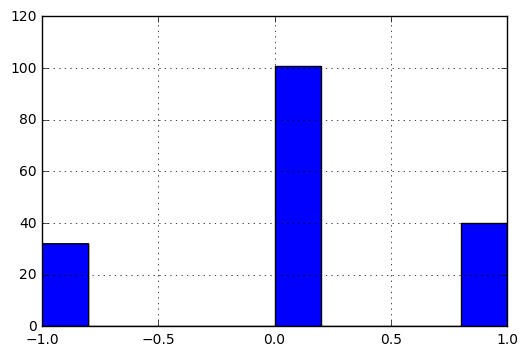

In [149]:
%matplotlib inline

import matplotlib.pyplot as plt

(y_lm - y_test2).hist()


In [150]:
coeff = lm.coef_
coeff

array([  0.00000000e+00,   6.44318227e-10,   3.43809673e-03,
        -8.65539069e-02,   3.99764329e-02,   4.23880800e-01,
        -3.90444698e-02,   1.89804872e-02,   5.65927993e-01,
         2.07829692e-01,  -3.90903527e-02,  -1.57674897e-02,
         1.31471451e-01,  -1.53844722e-01,  -1.08262300e-02,
        -1.34336552e-01,   1.24356288e-01,  -1.32172588e-01,
        -1.90642727e-01,  -9.71886037e-02,   2.13193442e-01,
         5.99345739e-02,   2.48114096e-01])

In [151]:
a = np.array(coeff)
b = np.argsort( a )
b

array([18, 13, 15, 17, 19,  3, 10,  6, 11, 14,  0,  1,  2,  7,  4, 21, 16,
       12,  9, 20, 22,  5,  8])

In [152]:
max_influencer_cols = b
max_influencer_cols = max_influencer_cols[::-1]
max_influencer_cols

array([ 8,  5, 22, 20,  9, 12, 16, 21,  4,  7,  2,  1,  0, 14, 11,  6, 10,
        3, 19, 17, 15, 13, 18])

In [153]:
def make_influencers(cols):
    influencers = []
    for index in cols:
        influencers.append(X2.columns[index])
    return influencers

In [154]:
top_factors = make_influencers(max_influencer_cols)
top_factors
top_factors = make_influencers(b)

In [155]:
top_factors

["': 'TV Movie'",
 "': 'Horror'",
 "': 'Mystery'",
 "': 'Science Fiction'",
 "': 'Thriller'",
 "': 'Action'",
 "': 'Family'",
 "': 'Comedy'",
 "': 'Fantasy'",
 "': 'Music'",
 'adult',
 'budget',
 'runtime',
 "': 'Crime'",
 "': 'Adventure'",
 "': 'Western'",
 "': 'Romance'",
 "': 'History'",
 "': 'Drama'",
 "': 'War'",
 'nlp_result',
 "': 'Animation'",
 "': 'Documentary'"]

In [35]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [156]:
from sklearn.linear_model import Ridge
alphas = [1.0]
clf = Ridge(alpha=alphas)
clf.fit(X_train2, y_train2)
ridge_result = clf.predict(X_test2)

In [157]:
import sklearn.metrics
y_ridge =  [ round(x) for x in ridge_result ]
len(y_ridge)

173

('Accuracy of Liner Regression test set  :', 0.58381502890173409)
('mean_squared_error of Liner Regression test set:', 0.41618497109826591)
('R2 of Liner Regression test set:', -0.18900343642611683)
('F1 of Liner Regression test set:', 0.58381502890173409)


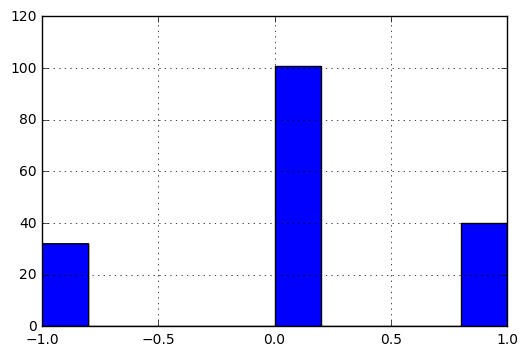

In [158]:
%matplotlib inline

import matplotlib.pyplot as plt


ridge_acc =  sklearn.metrics.accuracy_score(y_test2,y_ridge) 
mse_ridge_acc = sklearn.metrics.mean_squared_error(y_test2,y_ridge)
r2_ridge_acc = sklearn.metrics.r2_score(y_test2,y_ridge)
f1_ridge_acc = sklearn.metrics.f1_score(y_test2,y_ridge, average='micro')

print("Accuracy of Liner Regression test set  :",ridge_acc )   
print("mean_squared_error of Liner Regression test set:",mse_ridge_acc )
print("R2 of Liner Regression test set:",r2_ridge_acc )
print("F1 of Liner Regression test set:",f1_ridge_acc )

(y_ridge - y_test2).hist()


In [159]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [116]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [117]:
neg_reviews = []
pos_reviews = []

for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))

for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))
    
print(len(pos_reviews), len(neg_reviews))

(1000, 1000)


In [118]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [120]:
train_set = neg_reviews + pos_reviews
classifier = NaiveBayesClassifier.train(train_set)


In [127]:
def analyze_comments(text):
    return classifier.classify(create_word_features(word_tokenize(text.decode('utf-8'))))

In [128]:
genres_15_16_binned['nlp_result'] = genres_15_16_binned['Text'].apply(analyze_comments)
genres_15_16_binned.nlp_result.value_counts()

positive    806
negative     56
Name: nlp_result, dtype: int64

In [129]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [130]:
def is_positive(text):
    if text == 'positive':
        return 1
    return 0

genres_15_16_binned['nlp_result'] = genres_15_16_binned.nlp_result.apply(is_positive)

In [131]:
genres_15_16_binned.head(2)

Popularity                                               Text     Title  \
0    1.907407  GASI'm america diesel is something else like y...  400 Days   
1    1.475098  DiegoI like to be able to tell you everything ...  45 Years   

   Vote Average  Vote Count  adult  budget  revenue  runtime  vote_count  \
0             1         131  False       0        0     91.0       132.0   
1             2         218  False       0        0     95.0       217.0   

      ...      ': 'Horror'  ': 'Music'  ': 'Mystery'  ': 'Romance'  \
0     ...                0           0             1             0   
1     ...                0           0             0             0   

   ': 'Science Fiction'  ': 'TV Movie'  ': 'Thriller'  ': 'War'  ': 'Western'  \
0                     1              0              1         0             0   
1                     0              0              0         0             0   

   nlp_result  
0           1  
1           1  

[2 rows x 30 columns]

In [132]:
#MAKE CSV once this finishes
genres_15_16_binned.to_csv("genre_with_nlp_results.csv")

In [139]:
genres_15_16_binned.head(2)

Popularity                                               Text     Title  \
0    1.907407  GASI'm america diesel is something else like y...  400 Days   
1    1.475098  DiegoI like to be able to tell you everything ...  45 Years   

   Vote Average  Vote Count  adult  budget  revenue  runtime  vote_count  \
0             1         131  False       0        0     91.0       132.0   
1             2         218  False       0        0     95.0       217.0   

      ...      ': 'Horror'  ': 'Music'  ': 'Mystery'  ': 'Romance'  \
0     ...                0           0             1             0   
1     ...                0           0             0             0   

   ': 'Science Fiction'  ': 'TV Movie'  ': 'Thriller'  ': 'War'  ': 'Western'  \
0                     1              0              1         0             0   
1                     0              0              0         0             0   

   nlp_result  
0           1  
1           1  

[2 rows x 30 columns]

In [137]:
# ran = pd.read_csv("genre_with_nlp_results.csv")

In [138]:
# ran.head()

In [161]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(Y2, X2)
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).